In [61]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd

data = pd.read_csv('boscun_X.csv')
X = pd.read_csv('boscun_X.csv').values
y = pd.read_csv('boscun_y.csv').values
column_names = data.columns
# random selection
train_x_disorder, test_x_disorder, train_y_disorder, test_y_disorder = train_test_split(X, y, train_size=0.8,
                                                                                        random_state=1)
model_random_forest = RandomForestRegressor(n_estimators= 10, random_state = 2)
model_random_forest.fit(train_x_disorder, train_y_disorder.ravel())
mlp_score = model_random_forest.score(test_x_disorder, test_y_disorder.ravel())
print('Score of regression model is ', mlp_score)

Score of regression model is  0.94995801221


In [62]:
import numpy as np
b = pd.DataFrame()
index = np.argsort(model_random_forest.feature_importances_)
b = pd.DataFrame(columns = column_names[index])
b.loc[0,:] = model_random_forest.feature_importances_[index]

The 50% interval is [ -11.84575 ,  12.296 ]


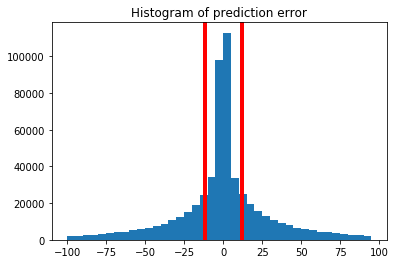

In [63]:
import matplotlib.pyplot as plt

bin1 = np.arange(-100., 100., 5.)
y_predicted = model_random_forest.predict(test_x_disorder)
error = test_y_disorder.ravel() - y_predicted

plt.hist(error, bin1, histtype='stepfilled')  # plt.hist passes it's arguments to np.histogram
plt.title("Histogram of prediction error")

p25 = np.percentile(error, 25)
p75 = np.percentile(error, 75)

print('The 50% interval is [', p25,', ', p75,']')

plt.axvline(p25,linewidth=4, color='r')
plt.axvline(p75,linewidth=4, color='r')

plt.show()